### Creating a linear Regression using a sample data

Slope: [1.96846751]
Intercept: [3.11107554]


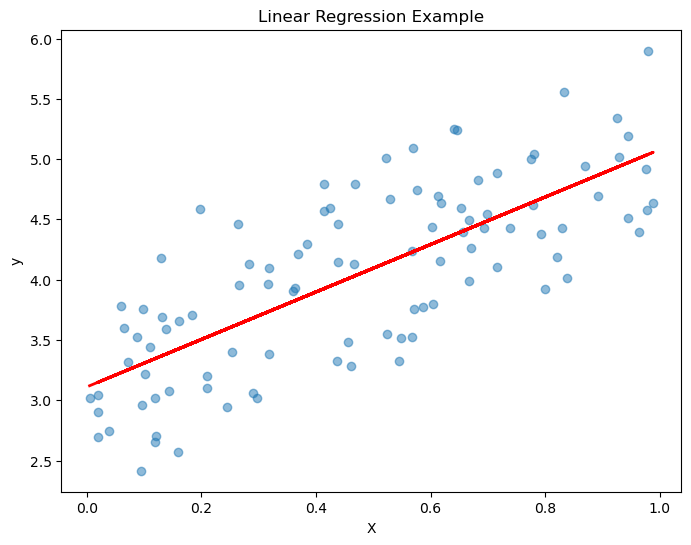

In [36]:
# Importing important Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 3 + np.random.normal(0, 0.5, (100, 1))

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the model parameters
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot the data and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='r', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2481096621811621
Mean Absolute Error: 0.4246290991619645
R-squared: 0.5648572443783962


### based on the above output there is still room for improvement

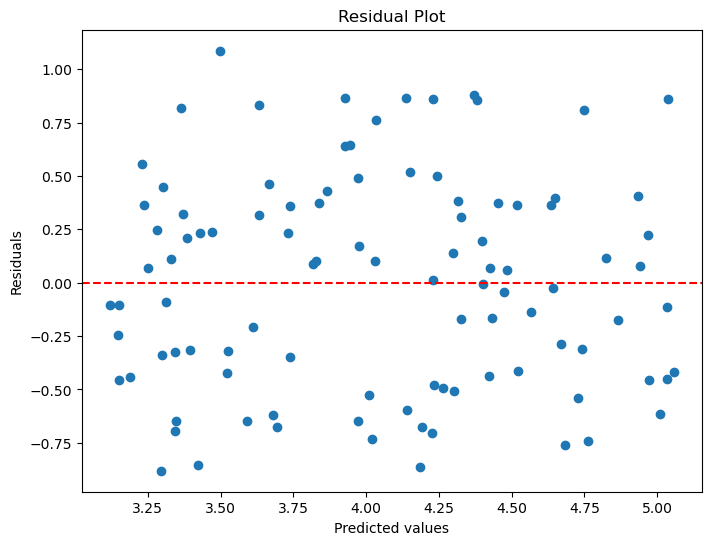

In [39]:
# we'll now visualize the residuals to check for patterns
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

###  since the points are a little more scattered away from the horizontal line at 0 there's room for improvement for the model to perfom better. 

In [41]:
# adding a second feature and training the combined features
X2 = np.random.rand(100, 1)  # Another feature
X_combined = np.hstack((X, X2))  # Combine features
model.fit(X_combined, y)

LinearRegression()

In [42]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[1.93734902 0.38950336]]
Intercept: [2.93933406]


In [43]:
y_pred_combined = model.predict(X_combined)

In [44]:
# let's evaluate again
mse_combined = mean_squared_error(y, y_pred_combined)
mae_combined = mean_absolute_error(y, y_pred_combined)
r2_combined = r2_score(y, y_pred_combined)

print(f'Mean Squared Error (combined): {mse_combined}')
print(f'Mean Absolute Error (combined): {mae_combined}')
print(f'R-squared (combined): {r2_combined}')

Mean Squared Error (combined): 0.23441272522425083
Mean Absolute Error (combined): 0.4072616102405105
R-squared (combined): 0.5888793757158444


### The model can still do better than this.

In [46]:
# Let's try another model (XGBoost)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - Mean Absolute Error: {mae_xgb}')
print(f'XGBoost - R-squared: {r2_xgb}')

XGBoost - Mean Squared Error: 0.3285175447610935
XGBoost - Mean Absolute Error: 0.4821493945670337
XGBoost - R-squared: 0.19629521242983017


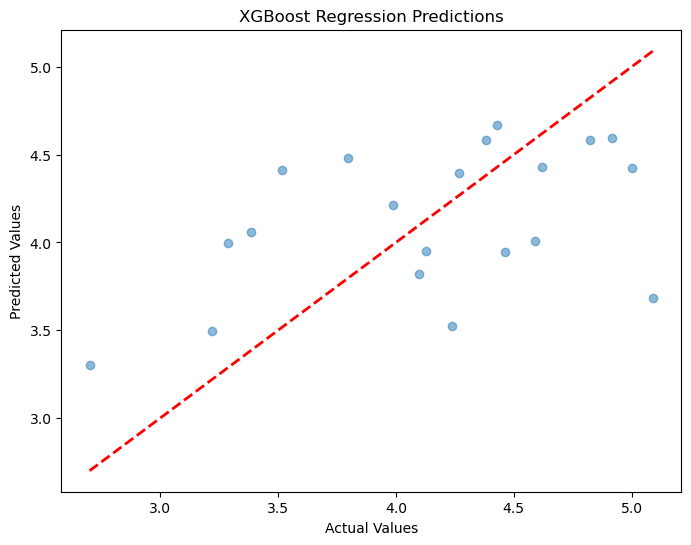

In [55]:
# let's visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression Predictions')
plt.show()

### By using real dataset and hyperparameter tunning the model may perform much better.